In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
# Create graph
sess = tf.Session()

# Declare batch size
batch_size = 50

x_shape = [3]
# Initialize placeholders
x_data = tf.placeholder(shape=[None, ] + x_shape, dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape= x_shape + [1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare the elastic net loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.mul(elastic_param1, l1_a_loss)
e2_term = tf.mul(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# Initialize variables
init = tf.initialize_all_variables()
sess.run(init)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [4]:
# Load the data
iris = datasets.load_iris()
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Training loop
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

# Get the optimal coefficients
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

Step #250 A = [[ 0.65207458]
 [ 0.73072523]
 [ 0.45029867]] b = [[ 0.19235906]]
Loss = [ 1.84126592]
Step #500 A = [[ 0.89113694]
 [ 0.59289145]
 [ 0.26076925]] b = [[ 0.33154598]]
Loss = [ 1.24236417]
Step #750 A = [[ 0.96020597]
 [ 0.5612849 ]
 [ 0.14976208]] b = [[ 0.4333722]]
Loss = [ 1.19015169]
Step #1000 A = [[ 0.96554661]
 [ 0.55960637]
 [ 0.07278672]] b = [[ 0.51998723]]
Loss = [ 1.13523555]


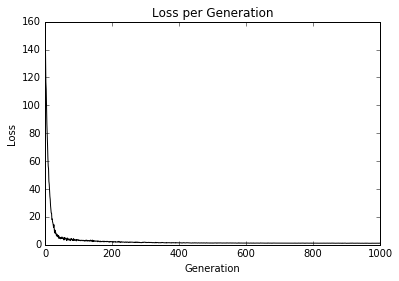

In [5]:
# Plot loss over time
%matplotlib inline
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()